In [1]:
import os
import numpy as np
import pandas as pd
import time
import visual_behavior.database as db
import datetime
pd.set_option('display.max_columns', 500)
import visual_behavior.data_access.loading as loading
import visual_behavior_glm.GLM_analysis_tools as gat
from visual_behavior import database as db
import matplotlib.pyplot as plt
import seaborn as sns

%widescreen

applied a custom magic command to make full use of screen width
will only work if command is defined locally
replace with the following to replicate functionality: 
	from IPython.core.display import display, HTML
	display(HTML("<style>.container { width:100% !important; }</style>")


In [2]:
%%time
glm_version = '7_L2_optimize_by_session'
experiment_table = gat.get_experiment_table(glm_version=glm_version)

CPU times: user 1min 40s, sys: 15.1 s, total: 1min 55s
Wall time: 2min 46s


In [4]:
experiment_table.head()

,ophys_experiment_id,ophys_session_id,behavior_session_id,container_id,project_code,container_workflow_state,experiment_workflow_state,session_name,session_type,equipment_name,date_of_acquisition,isi_experiment_id,specimen_id,sex,age_in_days,full_genotype,reporter_line,driver_line,imaging_depth,targeted_structure,published_at,super_container_id,cre_line,session_tags,failure_tags,exposure_number,model_outputs_available,location,has_events,session_number,roi_count,_id,glm_version,filename,file_text,job_timestamp,required_walltime,required_mem,required_vmem,entry_time_utc,required_walltime_seconds,required_walltime_minutes,required_walltime_hours,dropout_count
0,953659745,952430817,952554548,1018028339,VisualBehaviorMultiscope,completed,passed,20190923_457841_2imagesA,OPHYS_2_images_A_passive,MESO.1,2019-09-23 08:13:07.627573,858992726,850862430,F,209.0,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,['Ai148(TIT2L-GC6f-ICL-tTA2)'],['Sst-IRES-Cre'],75,VISp,NaN,850862430,Sst-IRES-Cre,NaN,"z_drift_corr_um_diff,z_drift_corr_um_diff,z_dr...",0,False,Sst_VISp_75,True,2,11,5f73b72187533762b370fc44,7_L2_optimize_by_session,/allen/programs/braintv/workgroups/nc-ophys/vi...,----------------------------------------\nBegi...,2020-09-25 17:58:36-07:00,00:05:21,2689296,5550744,2020-09-30 00:55:30.972366,321,5.350000,0.089167,68.0
1,953659749,952430817,952554548,1018028354,VisualBehaviorMultiscope,completed,passed,20190923_457841_2imagesA,OPHYS_2_images_A_passive,MESO.1,2019-09-23 08:13:07.627573,858992726,850862430,F,209.0,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,['Ai148(TIT2L-GC6f-ICL-tTA2)'],['Sst-IRES-Cre'],150,VISl,NaN,850862430,Sst-IRES-Cre,NaN,"z_drift_corr_um_diff,z_drift_corr_um_diff,z_dr...",0,False,Sst_VISl_150,True,2,23,5f73b721fd626775d9bba8e3,7_L2_optimize_by_session,/allen/programs/braintv/workgroups/nc-ophys/vi...,----------------------------------------\nBegi...,2020-09-25 18:01:17-07:00,00:08:02,3365180,5743808,2020-09-30 00:55:30.904851,482,8.033333,0.133889,68.0
2,953659752,952430817,952554548,1018028357,VisualBehaviorMultiscope,completed,passed,20190923_457841_2imagesA,OPHYS_2_images_A_passive,MESO.1,2019-09-23 08:13:07.627573,858992726,850862430,F,209.0,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,['Ai148(TIT2L-GC6f-ICL-tTA2)'],['Sst-IRES-Cre'],225,VISl,NaN,850862430,Sst-IRES-Cre,NaN,"z_drift_corr_um_diff,z_drift_corr_um_diff,z_dr...",0,False,Sst_VISl_225,True,2,15,5f73b728979e999afa0758b0,7_L2_optimize_by_session,/allen/programs/braintv/workgroups/nc-ophys/vi...,----------------------------------------\nBegi...,2020-09-25 17:58:32-07:00,00:05:16,2849548,5492916,2020-09-30 00:55:31.055984,316,5.266667,0.087778,68.0
3,953659743,952430817,952554548,1018028345,VisualBehaviorMultiscope,completed,passed,20190923_457841_2imagesA,OPHYS_2_images_A_passive,MESO.1,2019-09-23 08:13:07.627573,858992726,850862430,F,209.0,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,['Ai148(TIT2L-GC6f-ICL-tTA2)'],['Sst-IRES-Cre'],225,VISp,NaN,850862430,Sst-IRES-Cre,NaN,"z_drift_corr_um_diff,z_drift_corr_um_diff,z_dr...",0,False,Sst_VISp_225,True,2,14,5f73b72ee0efa57369fd31c9,7_L2_optimize_by_session,/allen/programs/braintv/workgroups/nc-ophys/vi...,----------------------------------------\nBegi...,2020-09-25 17:58:34-07:00,00:05:18,2769580,5471656,2020-09-30 00:55:30.974072,318,5.300000,0.088333,68.0
4,958527474,954954402,953982960,1018028339,VisualBehaviorMultiscope,completed,passed,20190924_457841_3imagesA,OPHYS_3_images_A,MESO.1,2019-09-24 16:00:00.000000,858992726,850862430,F,210.0,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,['Ai148(TIT2L-GC6f-ICL-tTA2)'],['Sst-IRES-Cre'],75,VISp,NaN,850862430,Sst-IRES-Cre,NaN,NaN,0,True,Sst_VISp_75,True,3,10,5f73b732cb6036a9e06383c9,7_L2_optimize_by_session,/allen/programs/braintv/workgroups/nc-ophys/vi...,----------------------------------------\nBegi...,2020-09-25 18:01:44-07:00,00:08:27,2255160,5594132,2020-09-30 00:55:30.798694,507,8.450000,0.140833,98.0


## some jobs don't have sufficient walltime to complete

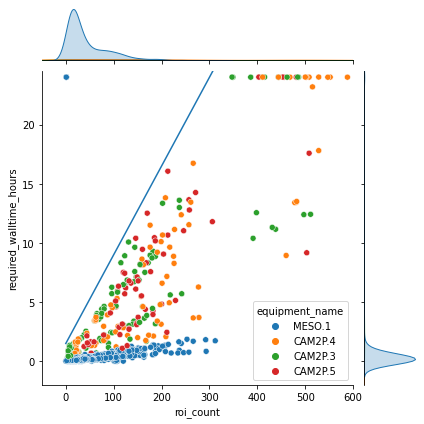

In [45]:
jp = sns.jointplot(
    data = experiment_table.fillna(0),
    x='roi_count',
    y='required_walltime_hours',
    hue='equipment_name',
    xlim = (-50,600),
    ylim=(-2,24.5),
)

def calculate_required_walltime(roi_count):
    '''calculate required walltime in hours'''
    return 1.5 + 0.075*roi_count

roi_count = np.arange(0,600,1)
jp.ax_joint.plot(
    roi_count,
    calculate_required_walltime(roi_count)
)

## it also looks like some jobs are running out of memory

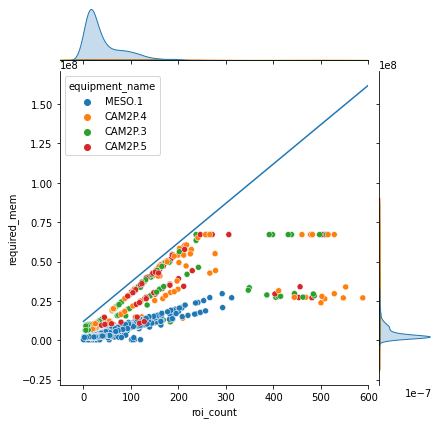

In [44]:
jp = sns.jointplot(
    data = experiment_table.fillna(0),
    x='roi_count',
    y='required_mem',
    hue='equipment_name',
    xlim = (-50,600),
)
def calculate_required_mem(roi_count):
    '''calculate required memory in GB'''
    return 12 + 0.25*roi_count

roi_count = np.arange(0,600,1)
jp.ax_joint.plot(
    roi_count,
    1e6*calculate_required_mem(roi_count)
)

In [52]:
experiment_table.sample(5)

,ophys_experiment_id,ophys_session_id,behavior_session_id,container_id,project_code,container_workflow_state,experiment_workflow_state,session_name,session_type,equipment_name,date_of_acquisition,isi_experiment_id,specimen_id,sex,age_in_days,full_genotype,reporter_line,driver_line,imaging_depth,targeted_structure,published_at,super_container_id,cre_line,session_tags,failure_tags,exposure_number,model_outputs_available,location,has_events,session_number,roi_count,_id,glm_version,filename,file_text,job_timestamp,required_walltime,required_mem,required_vmem,entry_time_utc,required_walltime_seconds,required_walltime_minutes,required_walltime_hours,dropout_count
499,1010557562,1010462508,1010487593,1018027971,VisualBehaviorMultiscope4areasx2d,holding,passed,20200226_489065_session4,OPHYS_4_images_H,MESO.1,2020-02-26 13:59:01.613631,972289328,958769031,F,206.0,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,['Ai148(TIT2L-GC6f-ICL-tTA2)'],['Vip-IRES-Cre'],270,VISl,NaN,958769031,Vip-IRES-Cre,NaN,percent_change_intensity,0,False,Vip_VISl_270,False,4,3,5f73b92781beffcc87483629,7_L2_optimize_by_session,/allen/programs/braintv/workgroups/nc-ophys/vi...,----------------------------------------\nBegi...,2020-09-25 20:18:13-07:00,00:05:24,2043332,5584140,2020-09-29 22:45:59.796257,324,5.400000,0.090000,88.0
1303,921024201,920695792,920839478,1018028188,VisualBehaviorMultiscope,completed,passed,20190809_453990_Ophys4,OPHYS_4_images_B,MESO.1,2019-08-09 12:55:56.000000,852262774,840544752,M,182.0,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,['Ai148(TIT2L-GC6f-ICL-tTA2)'],['Vip-IRES-Cre'],316,VISl,NaN,840544752,Vip-IRES-Cre,NaN,NaN,0,True,Vip_VISl_316,False,4,5,5f73bc4fbbbbc3f2c30500f5,7_L2_optimize_by_session,/allen/programs/braintv/workgroups/nc-ophys/vi...,----------------------------------------\nBegi...,2020-09-25 18:38:47-07:00,00:06:01,2115288,5560484,2020-09-29 22:59:27.398806,361,6.016667,0.100278,98.0
1299,920288843,919888953,920015895,1018028172,VisualBehaviorMultiscope,completed,passed,20190808_453990_Ophys3,OPHYS_3_images_A,MESO.1,2019-08-08 13:59:37.000000,852262774,840544752,M,181.0,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,['Ai148(TIT2L-GC6f-ICL-tTA2)'],['Vip-IRES-Cre'],221,VISp,NaN,840544752,Vip-IRES-Cre,NaN,z_drift_corr_um_diff,1,True,Vip_VISp_221,True,3,18,5f73bc6d937da76909602dff,7_L2_optimize_by_session,/allen/programs/braintv/workgroups/nc-ophys/vi...,----------------------------------------\nBegi...,2020-09-25 18:44:48-07:00,00:13:17,2960532,5767452,2020-09-29 22:59:57.539096,797,13.283333,0.221389,98.0
951,1000744365,1000439105,1000462035,1018027781,VisualBehaviorMultiscope,completed,passed,20200115_485152_ophys5,OPHYS_5_images_B_passive,MESO.1,2020-01-15 14:16:09.067721,949762677,935565389,M,188.0,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,['Ai93(TITL-GCaMP6f)'],"['Camk2a-tTA', 'Slc17a7-IRES2-Cre']",365,VISp,NaN,935565389,Slc17a7-IRES2-Cre,NaN,"parent_averaged_depth_image_2,parent_averaged_...",0,False,Slc17a7_VISp_365,False,5,45,5f73baaa89a511d71d72438b,7_L2_optimize_by_session,/allen/programs/braintv/workgroups/nc-ophys/vi...,----------------------------------------\nBegi...,2020-09-25 22:33:39-07:00,00:10:09,4287716,6277004,2020-09-29 22:52:26.344607,609,10.150000,0.169167,68.0
245,916220443,915306390,915418411,1018027884,VisualBehaviorMultiscope,completed,passed,20190801_453911_5imagesB_retake,OPHYS_5_images_B_passive,MESO.1,2019-08-01 08:14:00.752306,848541804,840390377,M,174.0,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,['Ai93(TITL-GCaMP6f)'],"['Camk2a-tTA', 'Slc17a7-IRES2-Cre']",371,VISp,NaN,840390377,Slc17a7-IRES2-Cre,NaN,"parent_averaged_depth_image_3,parent_averaged_...",2,False,Slc17a7_VISp_371,True,5,88,5f73b7ae780916e5e58008ab,7_L2_optimize_by_session,/allen/programs/braintv/workgroups/nc-ophys/vi...,----------------------------------------\nBegi...,2020-09-25 19:34:45-07:00,00:17:54,7371116,7377808,2020-09-29 22:39:42.393090,1074,17.900000,0.298333,68.0


In [53]:
experiment_table['date_of_acquisition'].max()

'2020-03-07 17:52:49.000000'